<a href="https://colab.research.google.com/github/SteenaR/CognoRise_Internship/blob/main/CognoRise%5BTask3%5D_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FAKE NEWS DETECTION**


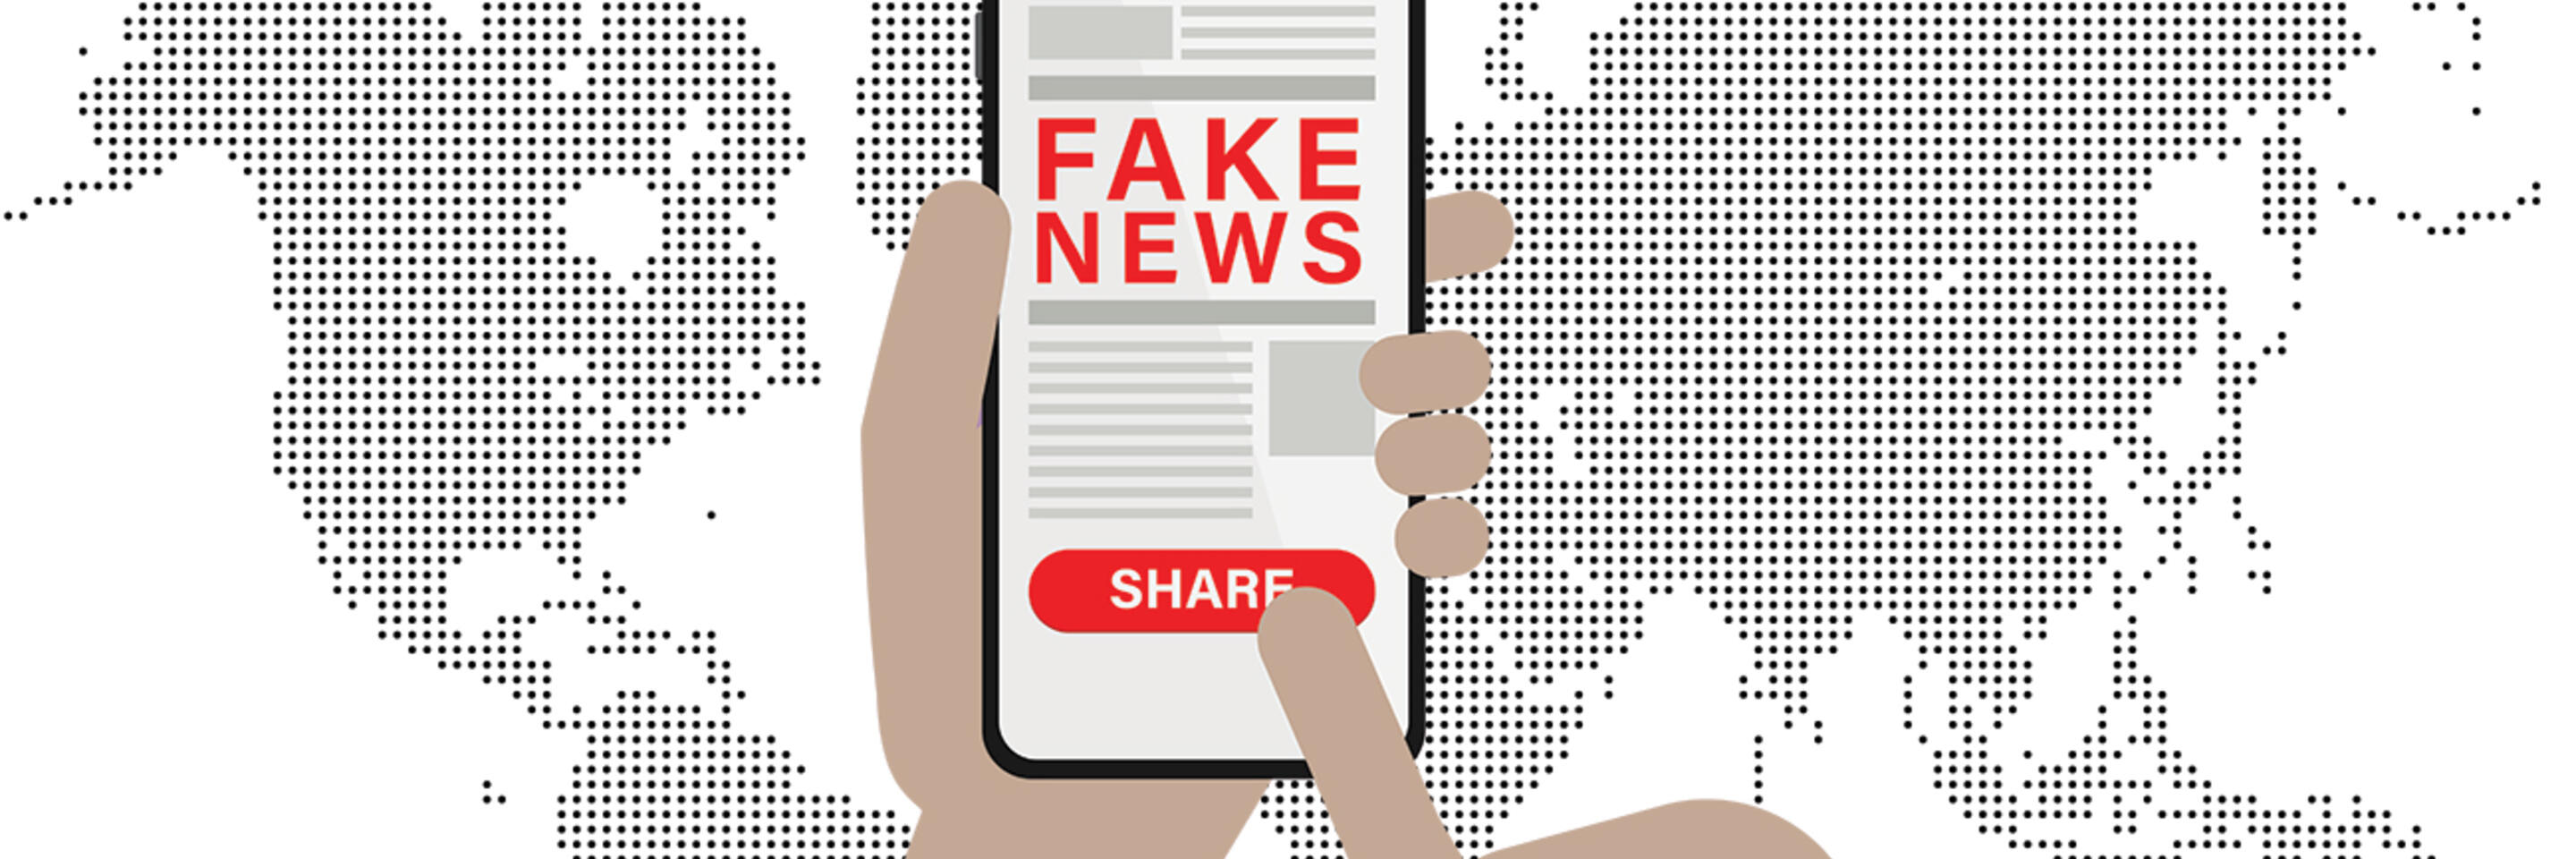

**Importing Libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [38]:
df = pd.read_csv('/content/news.csv', encoding='latin1')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [39]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


**Column Names**

In [40]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

**Number Of Rows And Columns**

In [41]:
df.shape

(6335, 4)

**Information Of The dataset**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


**Checking Any Missing Values**

In [43]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

**Checking DataType**

In [44]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

**Count Of The Target Value**

In [45]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

**Visualization Of The Target Value**

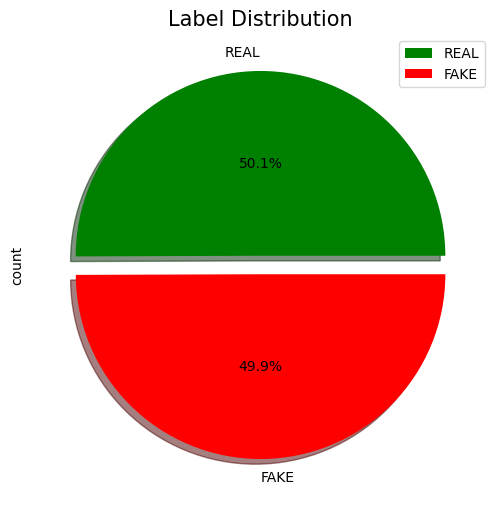

In [46]:
plt.figure(figsize=(10,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.5, explode=[0.05,0.05], shadow=True, colors=['green','red'])

plt.legend()
plt.title('Label Distribution', fontsize=15)
plt.show()


**Dropping Unneccessary Columns**

In [47]:
df.drop(['Unnamed: 0','title'], axis=1, inplace=True)

**Data Preprocessing**

In [48]:
df['label'] = df['label'].map({'FAKE':0, 'REAL':1})
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"â Kaydee King (@KaydeeKing) November 9, 2016...",0
4,It's primary day in New York and front-runners...,1
...,...,...
6330,The State Department told the Republican Natio...,1
6331,The âPâ in PBS Should Stand for âPlutocr...,0
6332,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"ADDIS ABABA, Ethiopia âPresident Obama conve...",1


In [49]:
#Importing And Downloading

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [50]:
#Assigning The Text Value To a Variable(Easy to Focus on the Text data)

texts= df.text

**Tokenization**

In [51]:
from nltk import TweetTokenizer
from nltk.tokenize import word_tokenize

tk= TweetTokenizer()
texts= texts.apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
texts

0       Daniel Greenfield , a Shillman Journalism Fell...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U . S . Secretary of State John F . Kerry said...
3       â   Kaydee King ( @KaydeeKing ) November 9 ,...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The â   Pâ   in PBS Should Stand for â  ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    ADDIS ABABA , Ethiopia â   President Obama c...
6334    Jeb Bush Is Suddenly Attacking Trump . Here's ...
Name: text, Length: 6335, dtype: object

**Removing Non-Alphanumeric Charcters**

In [52]:
import re

texts= texts.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
texts

0       Daniel Greenfield a Shillman Journalism Fellow...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U S Secretary of State John F Kerry said Monda...
3        Kaydee King KaydeeKing November 9 2016 The le...
4       It s primary day in New York and front runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The P in PBS Should Stand for Plutocratic or P...
6332    Anti Trump Protesters Are Tools of the Oligarc...
6333    ADDIS ABABA Ethiopia President Obama convened ...
6334    Jeb Bush Is Suddenly Attacking Trump Here s Wh...
Name: text, Length: 6335, dtype: object

**Removing Words With Length Less Than 3**

In [53]:
texts= texts.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w)>3]))
texts

0       Daniel Greenfield Shillman Journalism Fellow F...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       Secretary State John Kerry said Monday that wi...
3       Kaydee King KaydeeKing November 2016 lesson fr...
4       primary York front runners Hillary Clinton Don...
                              ...                        
6330    State Department told Republican National Comm...
6331    Should Stand Plutocratic Pentagon Posted 2016 ...
6332    Anti Trump Protesters Tools Oligarchy Reform a...
6333    ADDIS ABABA Ethiopia President Obama convened ...
6334    Bush Suddenly Attacking Trump Here That Matter...
Name: text, Length: 6335, dtype: object

**Lemmatization**

In [54]:
from nltk.stem import WordNetLemmatizer

lem= WordNetLemmatizer()
texts= texts.apply(lambda x: ' '.join([lem.lemmatize(w) for w in word_tokenize(x)]))
texts

0       Daniel Greenfield Shillman Journalism Fellow F...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       Secretary State John Kerry said Monday that wi...
3       Kaydee King KaydeeKing November 2016 lesson fr...
4       primary York front runner Hillary Clinton Dona...
                              ...                        
6330    State Department told Republican National Comm...
6331    Should Stand Plutocratic Pentagon Posted 2016 ...
6332    Anti Trump Protesters Tools Oligarchy Reform a...
6333    ADDIS ABABA Ethiopia President Obama convened ...
6334    Bush Suddenly Attacking Trump Here That Matter...
Name: text, Length: 6335, dtype: object

**Stopwords Removal**

In [55]:
from nltk.corpus import stopwords

stop_words= stopwords.words('english')
texts= texts.apply(lambda x: ' '.join([w for w in word_tokenize(x) if w not in stop_words]))
texts

0       Daniel Greenfield Shillman Journalism Fellow F...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       Secretary State John Kerry said Monday stop Pa...
3       Kaydee King KaydeeKing November 2016 lesson to...
4       primary York front runner Hillary Clinton Dona...
                              ...                        
6330    State Department told Republican National Comm...
6331    Should Stand Plutocratic Pentagon Posted 2016 ...
6332    Anti Trump Protesters Tools Oligarchy Reform a...
6333    ADDIS ABABA Ethiopia President Obama convened ...
6334    Bush Suddenly Attacking Trump Here That Matter...
Name: text, Length: 6335, dtype: object

**Ploting WordCloud Of The Text Data**

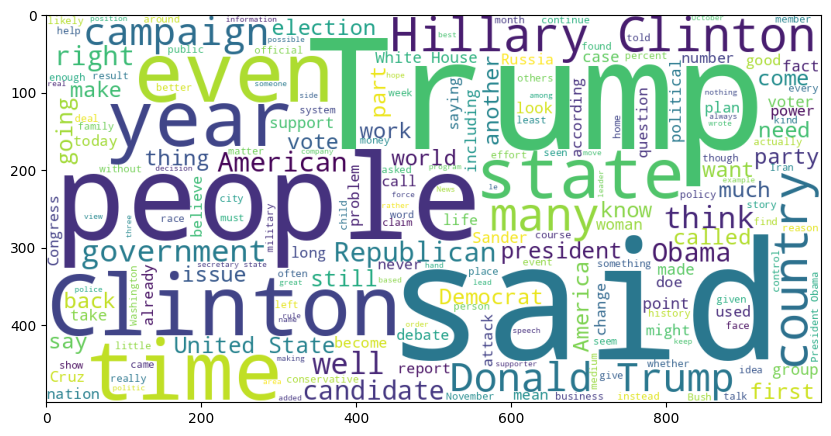

In [56]:
from wordcloud import WordCloud

plt.figure(figsize=(10,6))
word_cloud = ""
for i in texts:
    for word in i:
        word_cloud+= " ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

**Vectorization Using Bag_Of_Words**

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer()
train_data= cv.fit_transform(texts)
train_data.shape

(6335, 59341)

In [58]:
print(train_data)

  (0, 13400)	1
  (0, 22813)	1
  (0, 47857)	1
  (0, 28419)	1
  (0, 19647)	1
  (0, 20966)	1
  (0, 9334)	1
  (0, 58925)	2
  (0, 58573)	1
  (0, 20456)	1
  (0, 42567)	1
  (0, 27637)	1
  (0, 19935)	2
  (0, 50724)	2
  (0, 17144)	4
  (0, 24621)	18
  (0, 45240)	1
  (0, 10486)	16
  (0, 22448)	4
  (0, 58401)	1
  (0, 55554)	4
  (0, 53057)	1
  (0, 3973)	4
  (0, 37335)	1
  (0, 37910)	1
  :	:
  (6334, 36184)	1
  (6334, 13379)	1
  (6334, 50853)	1
  (6334, 22272)	2
  (6334, 14319)	1
  (6334, 3605)	1
  (6334, 27807)	1
  (6334, 55084)	1
  (6334, 54124)	1
  (6334, 31302)	1
  (6334, 28445)	1
  (6334, 56940)	1
  (6334, 14143)	2
  (6334, 53155)	1
  (6334, 44585)	1
  (6334, 8277)	1
  (6334, 14716)	1
  (6334, 11594)	2
  (6334, 50827)	1
  (6334, 51559)	1
  (6334, 27810)	1
  (6334, 56846)	1
  (6334, 13018)	2
  (6334, 56932)	1
  (6334, 19693)	1


**Defining Train And Test Data**

In [59]:
x= train_data
y= df['label']

**Splitting Training And Testing Data**

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

**MODEL CREATION**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = [LogisticRegression(C= 1,solver= 'liblinear',max_iter= 200), MultinomialNB(), LinearSVC(),RandomForestClassifier(criterion= 'entropy')]

In [62]:
for i in models:
  print('MODEL :',i)
  print('_'*100)
  i.fit(x_train, y_train)
  y_pred = i.predict(x_test)
  print('Accuracy Score :',accuracy_score(y_test, y_pred))
  print('Model Evaluation Performance')
  print(classification_report(y_test, y_pred))
  print('-'*100)

MODEL : LogisticRegression(C=1, max_iter=200, solver='liblinear')
____________________________________________________________________________________________________
Accuracy Score : 0.9137296159915834
Model Evaluation Performance
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       968
           1       0.92      0.91      0.91       933

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901

----------------------------------------------------------------------------------------------------
MODEL : MultinomialNB()
____________________________________________________________________________________________________
Accuracy Score : 0.8800631246712257
Model Evaluation Performance
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       968
           1       0.85      0.91      0.